In [16]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
import statsmodels.api as sm
import itertools
import scipy as sp





In [17]:
#load the data and check it out

data = pd.read_csv("Algerian_forest_fires_dataset_trimmed.csv", header = 1)
data 

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [18]:
# Cleaning data

# will substitute not fire for 0 and fire for 1

data = data.replace("not fire", 0)
data = data.replace("fire", 1)




## Split in training and validation data


cutoff = 85  # cutoff determines the length of the training data # 80% is  98 and 70 % is 85 # 85 gives more accuracy

data_train = data.iloc[:cutoff, :]

data_val =  data.iloc[cutoff:, :]



In [19]:
# Select x and y datasets train   Maybe consider less variables?


# x_train = preprocessing.normalize(data_train.iloc[:, 4:7]) # includign RH, Ws and Rain  # Not sure if my normalizing approach is fine lol 


x_train = data_train.iloc[:, 3:6].to_numpy()

y_train = data_train.iloc[:,-1].to_numpy()






# Select x and y datasets validation


# x_test = preprocessing.normalize(data_val.iloc[:, 4:7])

x_test = data_val.iloc[:, 3:6].to_numpy()

y_test = data_val.iloc[:,-1].to_numpy()



In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets

# n_neighbors = 20  # here insert the number of neighbors


# # # we only take the first two features. We could avoid this ugly
# # # slicing by using a two-dim dataset
# # X = iris.data[:, :2]
# # y = iris.target


# X = x_train

# y = y_train

# h = .02  # step size in the mesh

# # Create color maps

# cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
# cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# # we will try two different options for estimating the neighborhood
# for weights in ['uniform', 'distance']:
    
#     # we create an instance of Neighbours Classifier and fit the data.
#     clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    
#     clf.fit(X, y)

#     # Plot the decision boundary. For that, we will assign a color to each
#     # point in the mesh [x_min, x_max]x[y_min, y_max].
    
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                          np.arange(y_min, y_max, h))
    
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.figure()
#     plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

#     # Plot also the training points
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
#                 edgecolor='k', s=20)
    
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())
#     plt.title("3-Class classification (k = %i, weights = '%s')"
#               % (n_neighbors, weights))

# plt.show()

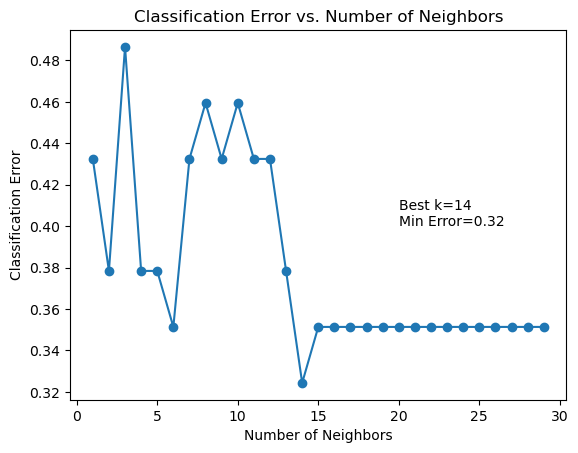

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors, datasets


# Vary the number of neighbors
neighbors_range = range(1, 30)  # You can adjust this range as needed


error_rates = []
best_k = None
min_error = float('inf')

for n_neighbors in neighbors_range:
    # Create and fit the KNN classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x_train, y_train)

    
    
    # Predict on the test set
    y_pred = clf.predict(x_test)

    # Compute classification error
    error_rate = np.mean(abs(y_pred-y_test)) # Don´t care about over(under)predicting just absolute error

    error_rates.append(error_rate)
    
    

    # Track the k value with the lowest error
    if error_rate < min_error:
        min_error = error_rate
        best_k = n_neighbors
    
    
# Plotting
plt.figure()
plt.plot(neighbors_range, error_rates, marker='o')


# Annotate the point with the lowest error
plt.annotate(f'Best k={best_k}\nMin Error={min_error:.2f}',
             xy=(20, 0.4))


plt.title('Classification Error vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Classification Error')

plt.savefig('error vs k.png', bbox_inches="tight")
plt.show()






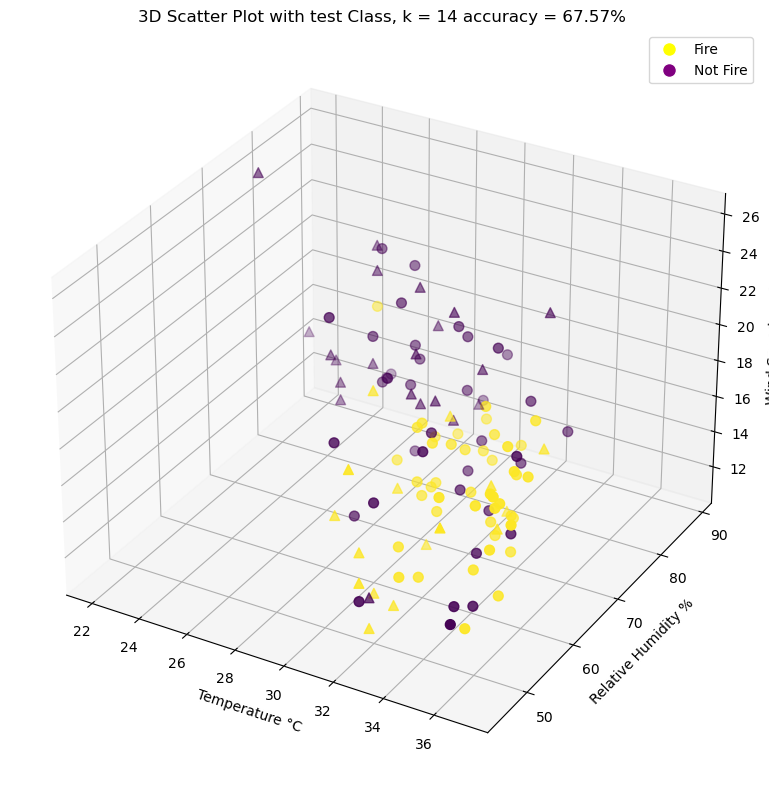

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# conduct knn 

n_neighbors = 14


v1 = 0

v2 = 1

v3 = 2


data_dict = {
    1: 'Temperature °C',
    2:'Relative Humidity %',
    3: 'Wind Speed ms-1'
}






# Create and fit the KNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)


# Predict on the test set
y_pred = clf.predict(x_test)




## Calculate accuracy 

accuracy = np.round(np.mean(y_pred == y_test) * 100.0, 2)

# Create a larger 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot of the three variables colored by the predicted class

scatter = ax.scatter(x_train[:, v1], x_train[:, v2], x_train[:, v3], c=y_train, cmap='viridis', s=50) # plot training data

scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], marker = "^",  c=y_pred, cmap='viridis', s=50) # plot testing (new) data 

# scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], c= "black", s = 50)

# Add labels and a legend for two output classes
ax.set_xlabel(data_dict[1])
ax.set_ylabel(data_dict[2])
ax.set_zlabel(data_dict[3])
ax.set_title(f'3D Scatter Plot with test Class, k = {n_neighbors} accuracy = {accuracy}% ')

legend_labels = ['Fire', 'Not Fire'] # Check order
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in ["yellow", "purple"]]


ax.legend(legend_handles, legend_labels)

plt.tight_layout()

plt.savefig('3d_test.png', bbox_inches="tight")
plt.show()


/tmp/ipykernel_1500/3526594706.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], marker = "^",  c= "white", edgecolors= "black", cmap='viridis', s=50) # plot testing (new) data


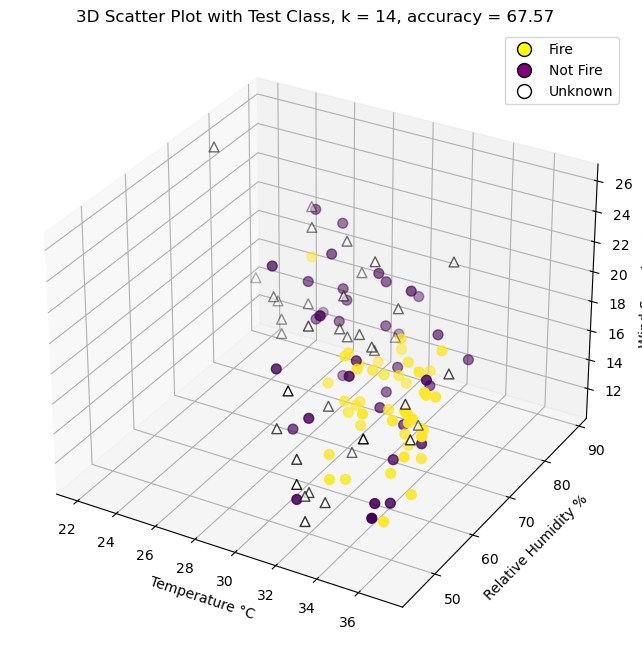

In [23]:

# Create and fit the KNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)


# Predict on the test set
y_pred = clf.predict(x_test)




## Calculate accuracy 

accuracy = np.round(np.mean(y_pred == y_test) * 100.0, 2)

# Create a larger 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


# Scatter plot of the three variables colored by the predicted class

scatter = ax.scatter(x_train[:, v1], x_train[:, v2], x_train[:, v3], c=y_train, cmap='viridis', s=50) # plot training data

scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], marker = "^",  c= "white", edgecolors= "black", cmap='viridis', s=50) # plot testing (new) data 

# scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], c= "black", s = 50)

# Add labels and a legend for two output classes
ax.set_xlabel(data_dict[1])
ax.set_ylabel(data_dict[2])
ax.set_zlabel(data_dict[3])
ax.set_title(f'3D Scatter Plot with Test Class, k = {n_neighbors}, accuracy = {accuracy} ')

legend_labels = ['Fire', 'Not Fire',"Unknown"] # Check order
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markeredgecolor = "black",  markerfacecolor=color, markersize=10) for color in ["yellow", "purple", "white"]]


ax.legend(legend_handles, legend_labels)


plt.savefig('3d_test_blank.png', bbox_inches="tight")

plt.show()



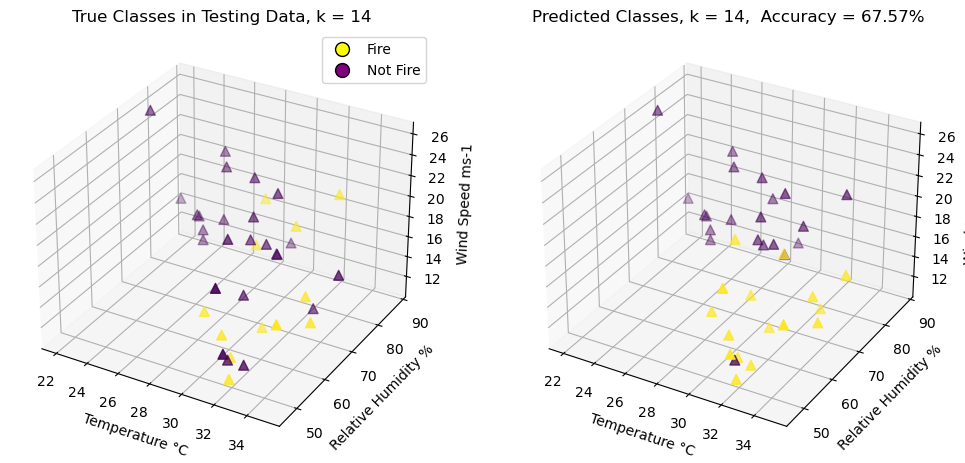

In [24]:





# Create and fit the KNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)


# Predict on the test set
y_pred = clf.predict(x_test)




## Calculate accuracy 

accuracy = np.round(np.mean(y_pred == y_test) * 100.0,2)



###PLOTING##


# Create a 3D scatter plot for training data
fig = plt.figure(figsize=(12, 6))

# Subplot 1



ax1 = fig.add_subplot(121, projection='3d')

# Scatter plot of the three variables colored by the predicted class

# scatter = ax1.scatter(x_train[:, v1], x_train[:, v2], x_train[:, v3], c=y_train, cmap='viridis', s=50) # plot training data

scatter = ax1.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], marker = "^",  c=y_test, cmap='viridis', s=50) # plot testing (new) data 

# scatter = ax.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], c= "black", s = 50)


ax1.set_xlabel(data_dict[1])
ax1.set_ylabel(data_dict[2])
ax1.set_zlabel(data_dict[3])
ax1.set_title(f'True Classes in Testing Data, k = {n_neighbors}')




legend_labels = ['Fire', 'Not Fire', "Unknown"] # Check order
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markeredgecolor = "black",  markerfacecolor=color, markersize=10) for color in ["yellow", "purple"]]


ax1.legend(legend_handles, legend_labels)



# Subplot 2
ax2 = fig.add_subplot(122, projection='3d')

# scatter2 = ax2.scatter(x_train[:, v1], x_train[:, v2], x_train[:, v3], c=y_train, cmap='viridis', s=50) # plot training data
scatter3 = ax2.scatter(x_test[:, v1], x_test[:, v2], x_test[:, v3], marker="^", c=y_pred, cmap='viridis', s=50)


ax2.set_xlabel(data_dict[1])
ax2.set_ylabel(data_dict[2])
ax2.set_zlabel(data_dict[3])
ax2.set_title(f'Predicted Classes, k = {n_neighbors},  Accuracy = {accuracy}%')



# Display the plots


plt.savefig("3d comparison", bbox_inches='tight')

plt.show()